In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
train_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")

In [3]:
train_df.dtypes[train_df.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## Outlier Management

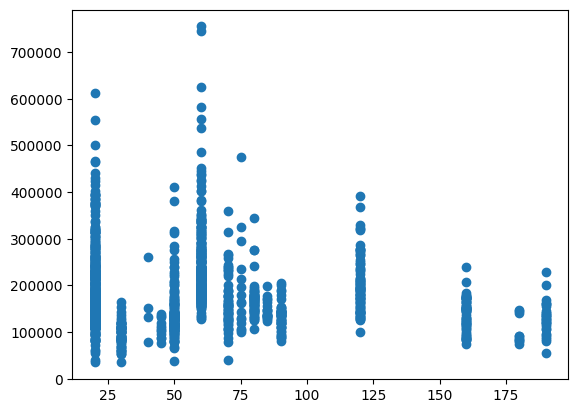

In [4]:
plt.scatter(x="MSSubClass",y="SalePrice",data=train_df)

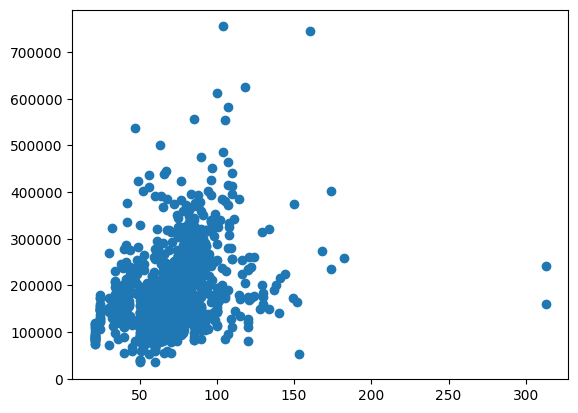

In [5]:
plt.scatter(x="LotFrontage",y="SalePrice",data=train_df)

In [6]:
train_df.query("LotFrontage > 300")
#Drop 935,1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


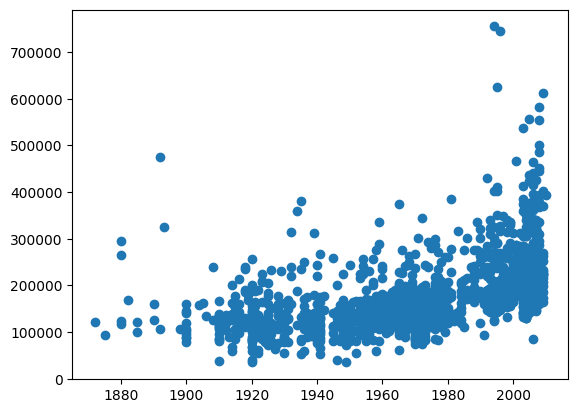

In [7]:
plt.scatter(x="YearBuilt",y="SalePrice",data=train_df)

In [8]:
train_df.query("YearBuilt > 1980 and SalePrice >700000")
#Drop 692,1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [9]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]


In [10]:
train_df = train_df[train_df.Id.isin(values) == False]
# train_df[içindeki True değerleri döndürür] 
# isin() komutu Id geçerli değer bulunuyorsa True döndürür
# == False True değerli False'a, False değerleri True'ya döndürür


## Null Management

In [11]:
missing_values = train_df.isna().sum().to_dict()
print(" | ".join(f"{k}: {v}" for k, v in missing_values.items()))

print("--------------------------------------------------------------------------------------")

missing_values = test_df.isna().sum().to_dict()
print(" | ".join(f"{k}: {v}" for k, v in missing_values.items()))

Id: 0 | MSSubClass: 0 | MSZoning: 0 | LotFrontage: 255 | LotArea: 0 | Street: 0 | Alley: 1350 | LotShape: 0 | LandContour: 0 | Utilities: 0 | LotConfig: 0 | LandSlope: 0 | Neighborhood: 0 | Condition1: 0 | Condition2: 0 | BldgType: 0 | HouseStyle: 0 | OverallQual: 0 | OverallCond: 0 | YearBuilt: 0 | YearRemodAdd: 0 | RoofStyle: 0 | RoofMatl: 0 | Exterior1st: 0 | Exterior2nd: 0 | MasVnrType: 861 | MasVnrArea: 8 | ExterQual: 0 | ExterCond: 0 | Foundation: 0 | BsmtQual: 37 | BsmtCond: 37 | BsmtExposure: 38 | BsmtFinType1: 37 | BsmtFinSF1: 0 | BsmtFinType2: 38 | BsmtFinSF2: 0 | BsmtUnfSF: 0 | TotalBsmtSF: 0 | Heating: 0 | HeatingQC: 0 | CentralAir: 0 | Electrical: 1 | 1stFlrSF: 0 | 2ndFlrSF: 0 | LowQualFinSF: 0 | GrLivArea: 0 | BsmtFullBath: 0 | BsmtHalfBath: 0 | FullBath: 0 | HalfBath: 0 | BedroomAbvGr: 0 | KitchenAbvGr: 0 | KitchenQual: 0 | TotRmsAbvGrd: 0 | Functional: 0 | Fireplaces: 0 | FireplaceQu: 684 | GarageType: 76 | GarageYrBlt: 76 | GarageFinish: 76 | GarageCars: 0 | GarageArea

In [12]:
# train_df = train_df.drop(["Alley", "MiscFeature","PoolQC","MasVnrType","FireplaceQu","Fence"],axis="columns")
# test_df = test_df.drop(["Alley", "MiscFeature","PoolQC","MasVnrType","FireplaceQu","Fence"],axis="columns")


In [13]:

# categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# del numerical_cols[len(numerical_cols)-1] # delete the salePrice from the columns 
# del numerical_cols[0] # delete the Id from the columns 

# for feature in categorical_cols:
#     feature_name = feature
#     value_for_missing = train_df[feature_name].mode()[0]
#     train_df[feature_name] = train_df[feature_name].fillna(value_for_missing)
#     test_df[feature_name] = test_df[feature_name].fillna(value_for_missing)

    
# for feature in numerical_cols:
#     feature_name = feature
#     value_for_missing = train_df[feature_name].median()
#     train_df[feature_name] = train_df[feature_name].fillna(value_for_missing)
#     test_df[feature_name] = test_df[feature_name].fillna(value_for_missing)


In [14]:
ohe_cols=train_df.dtypes[train_df.dtypes == object]

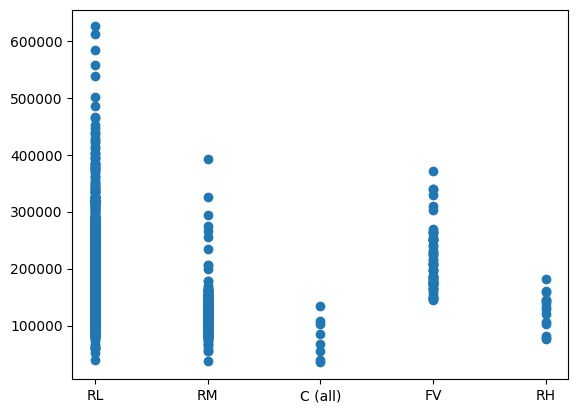

In [15]:
plt.scatter(x="MSZoning",y="SalePrice",data=train_df)

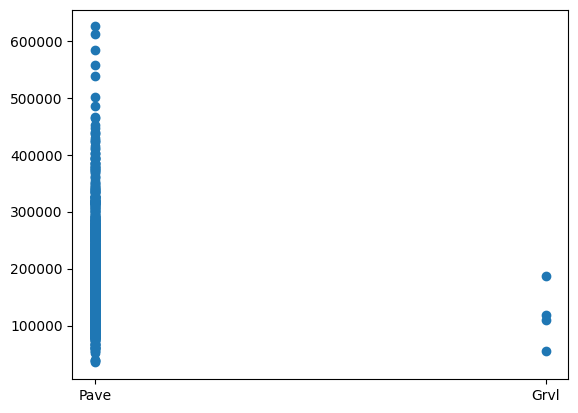

In [16]:
plt.scatter(x="Street",y="SalePrice",data=train_df)

## OneHotEncoding With Pipeline

In [17]:
 categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
 numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
numerical_cols.remove("Id")
numerical_cols.remove("SalePrice")

In [19]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
    ],
    remainder='drop',
    n_jobs=-1)

In [20]:
clf = LinearRegression()
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

In [21]:
xgb = XGBRegressor()
xgb_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', xgb)
])

In [22]:
clf_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBa...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', LinearRegression())])

In [23]:
xgb_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [24]:
X = train_df[numerical_cols+categorical_cols]
y = train_df["SalePrice"]

In [25]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
clf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBa...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', LinearRegression())])

In [27]:
clf_pipeline.score(X_test,y_test)

0.9119859524831951

In [28]:
y_predict = clf_pipeline.predict(X_test)

In [29]:
print("#Linear Regression Pipeline")
print(f"Mean Squared Error {mean_squared_error(y_test,y_predict)}")
print(f"Mean Absolute Error {mean_absolute_error(y_test,y_predict)}")
print(f"Mean Absolute Percantage Error {mean_absolute_percentage_error(y_test,y_predict)}")
print(f"Root of Mean Squared Error {np.sqrt(mean_squared_error(y_test,y_predict))}")
print(f"Score {clf_pipeline.score(X_test,y_test)}")

#Linear Regression Pipeline
Mean Squared Error 419040771.9927684
Mean Absolute Error 15407.694538244486
Mean Absolute Percantage Error 0.10094967459414374
Root of Mean Squared Error 20470.485387327004
Score 0.9119859524831951


In [30]:
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [31]:
y_predict = xgb_pipeline.predict(X_test)
print("#Linear Regression Pipeline")
print(f"Mean Squared Error {mean_squared_error(y_test,y_predict)}")
print(f"Mean Absolute Error {mean_absolute_error(y_test,y_predict)}")
print(f"Mean Absolute Percantage Error {mean_absolute_percentage_error(y_test,y_predict)}")
print(f"Root of Mean Squared Error {np.sqrt(mean_squared_error(y_test,y_predict))}")
print(f"Score {xgb_pipeline.score(X_test,y_test)}")

#Linear Regression Pipeline
Mean Squared Error 606067309.3824092
Mean Absolute Error 16592.092542860242
Mean Absolute Percantage Error 0.10209216203506172
Root of Mean Squared Error 24618.43434059951
Score 0.8727034681787815


## GridSearchCV

In [32]:
modelx = XGBRegressor()
p_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid = GridSearchCV(modelx,param_grid=p_grid,cv=5)

In [33]:
best_XGB = XGBRegressor(colsample_bytree= 0.8,
 learning_rate= 0.2,
 max_depth= 3,
 n_estimators= 200,
 subsample= 0.9)

grid_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', best_XGB)
])

In [34]:
grid_pipeline.fit(X_train,y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [35]:
#grid.best_params_ {'colsample_bytree': 0.8, 'learning_rate': 0.2,'max_depth': 3  'n_estimators': 200, 'subsample': 0.9}

In [36]:
#grid.best_score_

In [37]:
y_predict = grid_pipeline.predict(X_test)
print("#Grid Search XGB Regression Pipeline")
print(f"Mean Squared Error {mean_squared_error(y_test,y_predict)}")
print(f"Mean Absolute Error {mean_absolute_error(y_test,y_predict)}")
print(f"Mean Absolute Percantage Error {mean_absolute_percentage_error(y_test,y_predict)}")
print(f"Root of Mean Squared Error {np.sqrt(mean_squared_error(y_test,y_predict))}")
print(f"Score {grid_pipeline.score(X_test,y_test)}")

#Grid Search XGB Regression Pipeline
Mean Squared Error 375255565.33686614
Mean Absolute Error 14130.941392686633
Mean Absolute Percantage Error 0.09000848179331175
Root of Mean Squared Error 19371.51427578304
Score 0.9211824639367685


In [38]:
test_df = test_df.drop("Id",axis=1)

In [39]:
y_pred_test = grid_pipeline.predict(test_df)

result = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
result["SalePrice"] = y_pred_test
result.to_csv("sample_submission_GridXGB.csv",index=False)

## Result

In [40]:
# test_df = test_df.drop("Id",axis=1)

In [41]:
# y_pred_test = xgb_pipeline.predict(test_df)

# result = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
# result["SalePrice"] = y_pred_test
# result.to_csv("sample_submission.csv",index=False)


## ;OneHotEncoding

In [42]:
# df = pd.concat([train_df, test_df], axis = 0)
# df.head()

# df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)
# df_onehot = pd.concat([df[numerical_cols + ["SalePrice"]], df_dummies], axis=1)
# print(df_onehot.shape)
# df_onehot.head()

In [43]:
# train_df_onehot = df_onehot.iloc[0:train_df.shape[0],:]
# test_df_onehot = df_onehot.iloc[train_df.shape[0]:,:]
# print(train_df_onehot.shape)
# print(test_df_onehot.shape)

In [44]:
# X = train_df_onehot.drop(["SalePrice"], axis="columns")
# y = train_df_onehot["SalePrice"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# model = XGBRegressor(subsample=0.9, n_estimators=200, max_depth=3, learning_rate=0.2, colsample_bytree=0.8)

# model.fit(X_train, y_train)

# y_pred_valid = model.predict(X_test)
